# Data Science Unit 1 Sprint Challenge 2

## Data Wrangling and Storytelling

Taming data from its raw form into informative insights and stories.

## Data Wrangling

In this Sprint Challenge you will first "wrangle" some data from [Gapminder](https://www.gapminder.org/about-gapminder/), a Swedish non-profit co-founded by Hans Rosling. "Gapminder produces free teaching resources making the world understandable based on reliable statistics."
- [Cell phones (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv)
- [Population (total), by country and year](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Geo country codes](https://github.com/open-numbers/ddf--gapminder--systema_globalis/blob/master/ddf--entities--geo--country.csv)

These two links have everything you need to successfully complete the first part of this sprint challenge.
- [Pandas documentation: Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html) (one question)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) (everything else)

### Part 0. Load data

You don't need to add or change anything here. Just run this cell and it loads the data for you, into three dataframes.

In [191]:
import pandas as pd

cell_phones = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--cell_phones_total--by--geo--time.csv')

population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

geo_country_codes = (pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')
                       .rename(columns={'country': 'geo', 'name': 'country'}))

In [125]:
import matplotlib.pyplot as plt
import numpy as np

### Part 1. Join data

First, join the `cell_phones` and `population` dataframes (with an inner join on `geo` and `time`).

The resulting dataframe's shape should be: (8590, 4)

In [126]:
cell_phones.head()

,geo,time,cell_phones_total
0,abw,1960,0.0
1,abw,1965,0.0
2,abw,1970,0.0
3,abw,1975,0.0
4,abw,1976,0.0


In [127]:
population.head()

,geo,time,population_total
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [192]:
df = cell_phones.merge(population)

In [129]:
df.head()

,geo,time,cell_phones_total,population_total
0,afg,1960,0.0,8996351
1,afg,1965,0.0,9938414
2,afg,1970,0.0,11126123
3,afg,1975,0.0,12590286
4,afg,1976,0.0,12840299


In [130]:
df.shape

(8590, 4)

Then, select the `geo` and `country` columns from the `geo_country_codes` dataframe, and join with your population and cell phone data.

The resulting dataframe's shape should be: (8590, 5)

In [131]:
geo_country_codes.head()

,geo,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,...,latitude,longitude,main_religion_2008,country,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,nan,nan,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,...,12.5,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,...,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,...,-12.5,18.5,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.21667,-63.05,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [132]:
geo_country_codes[['geo', 'country']].head()

,geo,country
0,abkh,Abkhazia
1,abw,Aruba
2,afg,Afghanistan
3,ago,Angola
4,aia,Anguilla


In [193]:
df = df.merge(geo_country_codes[['geo', 'country']])

In [134]:
df.head()

,geo,time,cell_phones_total,population_total,country
0,afg,1960,0.0,8996351,Afghanistan
1,afg,1965,0.0,9938414,Afghanistan
2,afg,1970,0.0,11126123,Afghanistan
3,afg,1975,0.0,12590286,Afghanistan
4,afg,1976,0.0,12840299,Afghanistan


***Optional bonus for Part 1: Take initiative to join more data.***

In [137]:
df = df.merge(geo_country_codes[['geo', 'world_4region', 'un_state']]) #added the continent and whether or not in un_state
df.head()

,geo,time,cell_phones_total,population_total,country,world_4region,un_state
0,afg,1960,0.0,8996351,Afghanistan,asia,True
1,afg,1965,0.0,9938414,Afghanistan,asia,True
2,afg,1970,0.0,11126123,Afghanistan,asia,True
3,afg,1975,0.0,12590286,Afghanistan,asia,True
4,afg,1976,0.0,12840299,Afghanistan,asia,True


### Part 2. Make features

Calculate the number of cell phones per person, and add this column onto your dataframe.

(You've calculated correctly if you get 1.220 cell phones per person in the United States in 2017.)

In [194]:
df['cell_per_person'] = df['cell_phones_total'] / df['population_total']

In [195]:
df.head()

,geo,time,cell_phones_total,population_total,country,cell_per_person
0,afg,1960,0.0,8996351,Afghanistan,0.0
1,afg,1965,0.0,9938414,Afghanistan,0.0
2,afg,1970,0.0,11126123,Afghanistan,0.0
3,afg,1975,0.0,12590286,Afghanistan,0.0
4,afg,1976,0.0,12840299,Afghanistan,0.0


In [196]:
df[(df['time'] == 2017) & (df['country'] == 'United States')]

,geo,time,cell_phones_total,population_total,country,cell_per_person
8134,usa,2017,"395,881,000.0",324459463,United States,1.2201246847283354


Modify the `geo` column to make the geo codes uppercase instead of lowercase.

In [197]:
def make_capital(entry):
    return entry.upper()

df['geo'] = df['geo'].apply(make_capital)

In [198]:
df.head()

,geo,time,cell_phones_total,population_total,country,cell_per_person
0,AFG,1960,0.0,8996351,Afghanistan,0.0
1,AFG,1965,0.0,9938414,Afghanistan,0.0
2,AFG,1970,0.0,11126123,Afghanistan,0.0
3,AFG,1975,0.0,12590286,Afghanistan,0.0
4,AFG,1976,0.0,12840299,Afghanistan,0.0


In [189]:
def make_title(entry):
    return entry.title()

df['world_4region'] = df['world_4region'].apply(make_title)

In [190]:
df.head()

,geo,time,cell_phones_total,population_total,country,world_4region,un_state,cell_per_person
0,AFG,1960,0.0,8996351,Afghanistan,Asia,True,0.0
1,AFG,1965,0.0,9938414,Afghanistan,Asia,True,0.0
2,AFG,1970,0.0,11126123,Afghanistan,Asia,True,0.0
3,AFG,1975,0.0,12590286,Afghanistan,Asia,True,0.0
4,AFG,1976,0.0,12840299,Afghanistan,Asia,True,0.0


***Optional bonus for Part 2: Take initiative to make more features.***

### Part 3. Process data

Use the describe function, to describe your dataframe's numeric columns, and then its non-numeric columns.

(You'll see the time period ranges from 1960 to 2017, and there are 195 unique countries represented.)

In [199]:
df.describe()

,time,cell_phones_total,population_total,cell_per_person
count,"8,590.0","8,590.0","8,590.0","8,590.0"
mean,"1,994.1934807916182","9,004,949.642905472","29,838,230.581722934",0.2796385558059151
std,14.257974607310302,"55,734,084.872179635","116,128,377.47477299",0.454246656214052
min,"1,960.0",0.0,"4,433.0",0.0
25%,"1,983.0",0.0,"1,456,148.0",0.0
50%,"1,995.0","6,200.0","5,725,062.5",0.0015636266438163813
75%,"2,006.0","1,697,652.0","18,105,812.0",0.4611491855201403
max,"2,017.0","1,474,097,000.0","1,409,517,397.0",2.490242818521353


In [200]:
df.describe(exclude=np.number)

,geo,country
count,8590,8590
unique,195,195
top,MWI,Bosnia and Herzegovina
freq,46,46


In 2017, what were the top 5 countries with the most cell phones total?

Your list of countries should have these totals:

| country | cell phones total |
|:-------:|:-----------------:|
|    ?    |     1,474,097,000 |
|    ?    |     1,168,902,277 |
|    ?    |       458,923,202 |
|    ?    |       395,881,000 |
|    ?    |       236,488,548 |



In [201]:
# This optional code formats float numbers with comma separators
pd.options.display.float_format = '{:,}'.format

In [207]:
df[df['time'] == 2017].sort_values(by=['cell_phones_total'], ascending=False).head()

,geo,time,cell_phones_total,population_total,country,cell_per_person
1496,CHN,2017,"1,474,097,000.0",1409517397,China,1.0458168186766978
3595,IND,2017,"1,168,902,277.0",1339180127,India,0.8728491809526382
3549,IDN,2017,"458,923,202.0",263991379,Indonesia,1.738402230172827
8134,USA,2017,"395,881,000.0",324459463,United States,1.2201246847283354
1084,BRA,2017,"236,488,548.0",209288278,Brazil,1.1299655683535224


What was the first year that the USA had more cell phones than people?

In [209]:
df[df['country'] == 'United States'].sort_values(by=['cell_phones_total'], ascending=False).head()

,geo,time,cell_phones_total,population_total,country,cell_per_person
8134,USA,2017,"395,881,000.0",324459463,United States,1.2201246847283354
8133,USA,2016,"395,881,000.0",322179605,United States,1.228758722948959
8132,USA,2015,"382,307,000.0",319929162,United States,1.1949739048796058
8131,USA,2014,"355,500,000.0",317718779,United States,1.118914031833164
8130,USA,2013,"310,698,000.0",315536676,United States,0.9846652501340288


The first year that the USA had more cell phones than people was 2014.

***Optional bonus for Part 3: Take initiative to do more exploratory data analysis.***

In [211]:
df[df['country'] == 'China'].sort_values(by=['cell_phones_total'], ascending=False).head()

,geo,time,cell_phones_total,population_total,country,cell_per_person
1496,CHN,2017,"1,474,097,000.0",1409517397,China,1.0458168186766978
1495,CHN,2016,"1,364,934,000.0",1403500365,China,0.9725213003418065
1494,CHN,2015,"1,291,984,200.0",1397028553,China,0.9248087286588194
1493,CHN,2014,"1,286,093,000.0",1390110388,China,0.9251732891877361
1492,CHN,2013,"1,229,113,000.0",1382793212,China,0.8888624772913624


2017 was the first year that China had more cell phones than people.

In [213]:
df[df['country'] == 'India'].sort_values(by=['cell_phones_total'], ascending=False).head()

,geo,time,cell_phones_total,population_total,country,cell_per_person
3595,IND,2017,"1,168,902,277.0",1339180127,India,0.8728491809526382
3594,IND,2016,"1,127,809,000.0",1324171354,India,0.8517092569576913
3593,IND,2015,"1,001,056,000.0",1309053980,India,0.7647171280133154
3592,IND,2014,"944,008,677.0",1293859294,India,0.7296069065451255
3589,IND,2011,"893,862,478.0",1247236029,India,0.7166746768185286


India still does not have as many cell phones as they do people!

### (OPTIONAL) Part 4. Reshape data

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

Create a pivot table:
- Columns: Years 2007—2017
- Rows: China, India, United States, Indonesia, Brazil (order doesn't matter)
- Values: Cell Phones Total

The table's shape should be: (5, 11)

In [214]:
table = pd.pivot_table(df,index='country',  values='cell_phones_total', columns=['time'])

In [216]:
table1 = table.query('country == ["China", "India", "United States", "Indonesia", "Brazil"]')

In [222]:
table2 = table1.T

In [228]:
table2 = table2.query('time == [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]')

In [229]:
final = table2.T

In [231]:
final

time,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
country,,,,,,,,,,,
Brazil,"120,980,103.0","150,641,403.0","169,385,584.0","196,929,978.0","234,357,507.0","248,323,703.0","271,099,799.0","280,728,796.0","257,814,274.0","244,067,356.0","236,488,548.0"
China,"547,306,000.0","641,245,000.0","747,214,000.0","859,003,000.0","986,253,000.0","1,112,155,000.0","1,229,113,000.0","1,286,093,000.0","1,291,984,200.0","1,364,934,000.0","1,474,097,000.0"
India,"233,620,000.0","346,890,000.0","525,090,000.0","752,190,000.0","893,862,478.0","864,720,917.0","886,304,245.0","944,008,677.0","1,001,056,000.0","1,127,809,000.0","1,168,902,277.0"
Indonesia,"93,386,881.0","140,578,243.0","163,676,961.0","211,290,235.0","249,805,619.0","281,963,665.0","313,226,914.0","325,582,819.0","338,948,340.0","385,573,398.0","458,923,202.0"
United States,"249,300,000.0","261,300,000.0","274,283,000.0","285,118,000.0","297,404,000.0","304,838,000.0","310,698,000.0","355,500,000.0","382,307,000.0","395,881,000.0","395,881,000.0"


In [233]:
final.shape

(5, 11)

Sort these 5 countries, by biggest increase in cell phones from 2007 to 2017.

Which country had 935,282,277 more cell phones in 2017 versus 2007?

If you have the time and curiosity, what other questions can you ask and answer with this data?

## Data Storytelling

In this part of the sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

### Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

### Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

**Optional Bonus Challenge:** Do additional insightful data exploration.

In [23]:
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [24]:
pd.crosstab(df.Year, df.Occupation, normalize='index')

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,0.9036144578313253,0.012048192771084338,0.06626506024096386,0.018072289156626505
2000,0.7396449704142012,0.08284023668639054,0.1242603550295858,0.05325443786982249
2001,0.7261146496815286,0.03821656050955414,0.19745222929936307,0.03821656050955414
2002,0.6226415094339622,0.06918238993710692,0.2641509433962264,0.0440251572327044
2003,0.5602409638554217,0.10240963855421686,0.2469879518072289,0.09036144578313253
2004,0.38414634146341464,0.22560975609756098,0.27439024390243905,0.11585365853658537
2005,0.37037037037037035,0.16049382716049382,0.3333333333333333,0.13580246913580246
2006,0.36024844720496896,0.19254658385093168,0.2919254658385093,0.15527950310559005
2007,0.2553191489361702,0.1702127659574468,0.3333333333333333,0.24113475177304963


### Part 2 — Recreate this explanatory visualization:

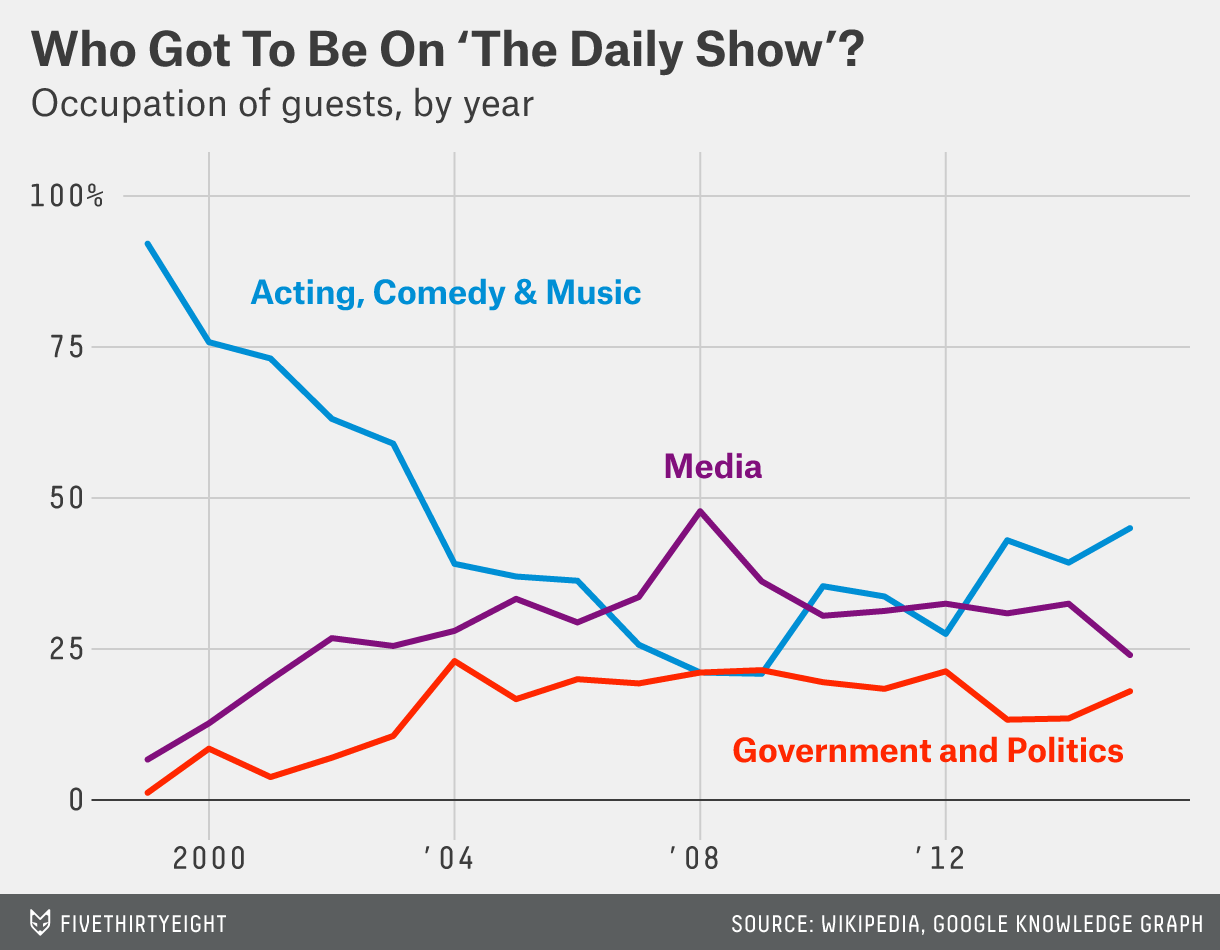

In [25]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.

In [26]:
import seaborn as sns
sns.__version__

'0.9.0'

In [31]:
#!pip install --upgrade seaborn

In [28]:
import seaborn as sns
sns.__version__

'0.9.0'

In [69]:
#sns.lineplot(pd.crosstab(df.Year, df.Occupation, normalize='index'), )

In [72]:
df.Year.unique()

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015])

In [73]:
last = pd.crosstab(df.Year, df.Occupation, normalize='index')

In [81]:
print(last.iloc[0])

Occupation
Acting, Comedy & Music      0.9036144578313253
Government and Politics   0.012048192771084338
Media                      0.06626506024096386
Other                     0.018072289156626505
Name: 1999, dtype: float64


In [83]:
last.columns

Index(['Acting, Comedy & Music', 'Government and Politics', 'Media', 'Other'], dtype='object', name='Occupation')

In [90]:
last.index.name = None #trying to get rid of the name = Occupation!!!

In [92]:
last.columns #still can't get rid of the stupid name

Index(['Acting, Comedy & Music', 'Government and Politics', 'Media', 'Other'], dtype='object', name='Occupation')

In [94]:
last.head()

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other
1999,0.9036144578313253,0.012048192771084338,0.06626506024096386,0.018072289156626505
2000,0.7396449704142012,0.08284023668639054,0.1242603550295858,0.05325443786982249
2001,0.7261146496815286,0.03821656050955414,0.19745222929936307,0.03821656050955414
2002,0.6226415094339622,0.06918238993710692,0.2641509433962264,0.0440251572327044
2003,0.5602409638554217,0.10240963855421686,0.2469879518072289,0.09036144578313253


In [122]:
last['Year'] = last.index #making my own column of unique years

In [123]:
last.head()

Occupation,"Acting, Comedy & Music",Government and Politics,Media,Other,Year
1999,0.9036144578313253,0.012048192771084338,0.06626506024096386,0.018072289156626505,1999
2000,0.7396449704142012,0.08284023668639054,0.1242603550295858,0.05325443786982249,2000
2001,0.7261146496815286,0.03821656050955414,0.19745222929936307,0.03821656050955414,2001
2002,0.6226415094339622,0.06918238993710692,0.2641509433962264,0.0440251572327044,2002
2003,0.5602409638554217,0.10240963855421686,0.2469879518072289,0.09036144578313253,2003


In [100]:
del last.index.name

In [105]:
last_one = last[['Year', 'Acting, Comedy & Music', 'Government and Politics', 'Media']] #I try grabbing just the years I want from the crosstab

In [115]:
last_one.name = None
last_one.columns

Index(['Year', 'Acting, Comedy & Music', 'Government and Politics', 'Media'], dtype='object', name='Occupation')

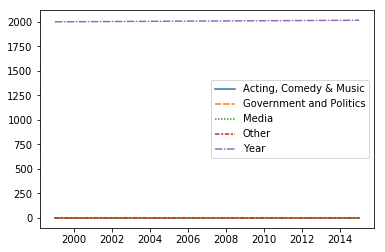

In [187]:
sns.lineplot(data=last)

### (OPTIONAL) Part 3 — Who were the top 10 guests on _The Daily Show_?

*This part is not needed to pass the sprint challenge, only to get a 3! Only work on this after completing the other sections.*

**Make a plot** that shows their names and number of appearances.

**Add a title** of your choice.

**Expectations:** It's ok to make a simple, quick plot: exploratory, instead of explanatory. 

**Optional Bonus Challenge:** You can change aesthetics and add more annotation. For example, in a relevant location, could you add the text "19" to show that Fareed Zakaria appeared 19 times on _The Daily Show_? (And so on, for each of the top 10 guests.)